In [46]:
import pandas as pd
import datasist as ds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
%cd ../src

/home/miguel/Documentos/Master-Degree-Research/Positron-Binding-Energy/src


In [4]:
# This is data cointaining all apolar molecules
all_df = pd.read_csv("../data/processed/processed_apolar.csv")
partial_df = pd.read_csv("../data/final/final_apolar.csv")

# All 20 Molecules

In [6]:
from sklearn.svm import SVR
from utils.evaluation import show_metrics

x0 = all_df.drop(['Molecule', 'Formula','Expt'],axis=1)
y0 = all_df[['Expt']]

show_metrics(SVR(kernel = 'linear'), x0, y0, 5)

Test Scores: [0.88719994 0.25540071 0.0473333  0.24573488 0.13862077]
Mean Test Scores: 0.31
Std of Scores: 0.3
Min and Max of Scores: 0.05, 0.89

Train Score: 0.29



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [7]:
from sklearn.linear_model import LinearRegression
show_metrics(LinearRegression(), x0, y0, 5)

Test Scores: [0.76552318 0.28519958 0.08337337 1.26057673 0.08259003]
Mean Test Scores: 0.5
Std of Scores: 0.46
Min and Max of Scores: 0.08, 1.26

Train Score: 0.37



In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from utils.data import log_transform

transformer = FunctionTransformer(log_transform)

numerical_transformer = ColumnTransformer([('log', transformer, [0, 1])])

svr = Pipeline([('log', numerical_transformer), ('reg', SVR(kernel='linear'))])
lin = Pipeline([('log', numerical_transformer), ('reg', LinearRegression())])

In [9]:
show_metrics(svr, x0, y0, 5)

Test Scores: [2.25845586 0.25891092 0.26553697 3.59157032 0.70932022]
Mean Test Scores: 1.42
Std of Scores: 1.31
Min and Max of Scores: 0.26, 3.59

Train Score: 1.34



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [10]:
'pi' in 'PI E OI'.lower()

True

In [11]:
show_metrics(lin, x0, y0, 5)

Test Scores: [2.18928744 0.66921514 0.33498155 1.08836665 0.325834  ]
Mean Test Scores: 0.92
Std of Scores: 0.69
Min and Max of Scores: 0.33, 2.19

Train Score: 0.77



In [12]:
# This test was just to compare if the log transform could help us, but it seens it won't

# 17 Molecules

In [13]:
partial_df

,Molecule,Formula,Ei,Alpha,Expt,axx,ayy,azz,pi_bond
0,Butane,C4H10,10.6,8.08,35,9.31,7.68,7.24,0
1,Pentane,C5H12,10.4,9.95,60,11.72,9.39,8.74,0
2,Hexane,C6H14,10.2,11.85,80,14.32,10.99,10.23,0
3,Heptane,C7H16,9.9,13.76,105,16.91,12.66,11.72,0
4,Octane,C8H18,10.0,15.68,115,19.60,14.26,13.19,0
5,Nonane,C9H20,10.0,16.75,145,21.31,14.93,14.01,0
6,Ethylene,C2H4,10.5,4.18,20,5.43,3.77,3.35,1
7,Cyclopropane,C3H6,9.9,5.51,10,5.75,5.75,5.04,0
8,Cyclohexane,C6H12,9.9,10.79,80,11.29,11.29,9.78,0
9,Benzene,C6H6,9.3,10.40,150,12.27,12.27,6.67,3


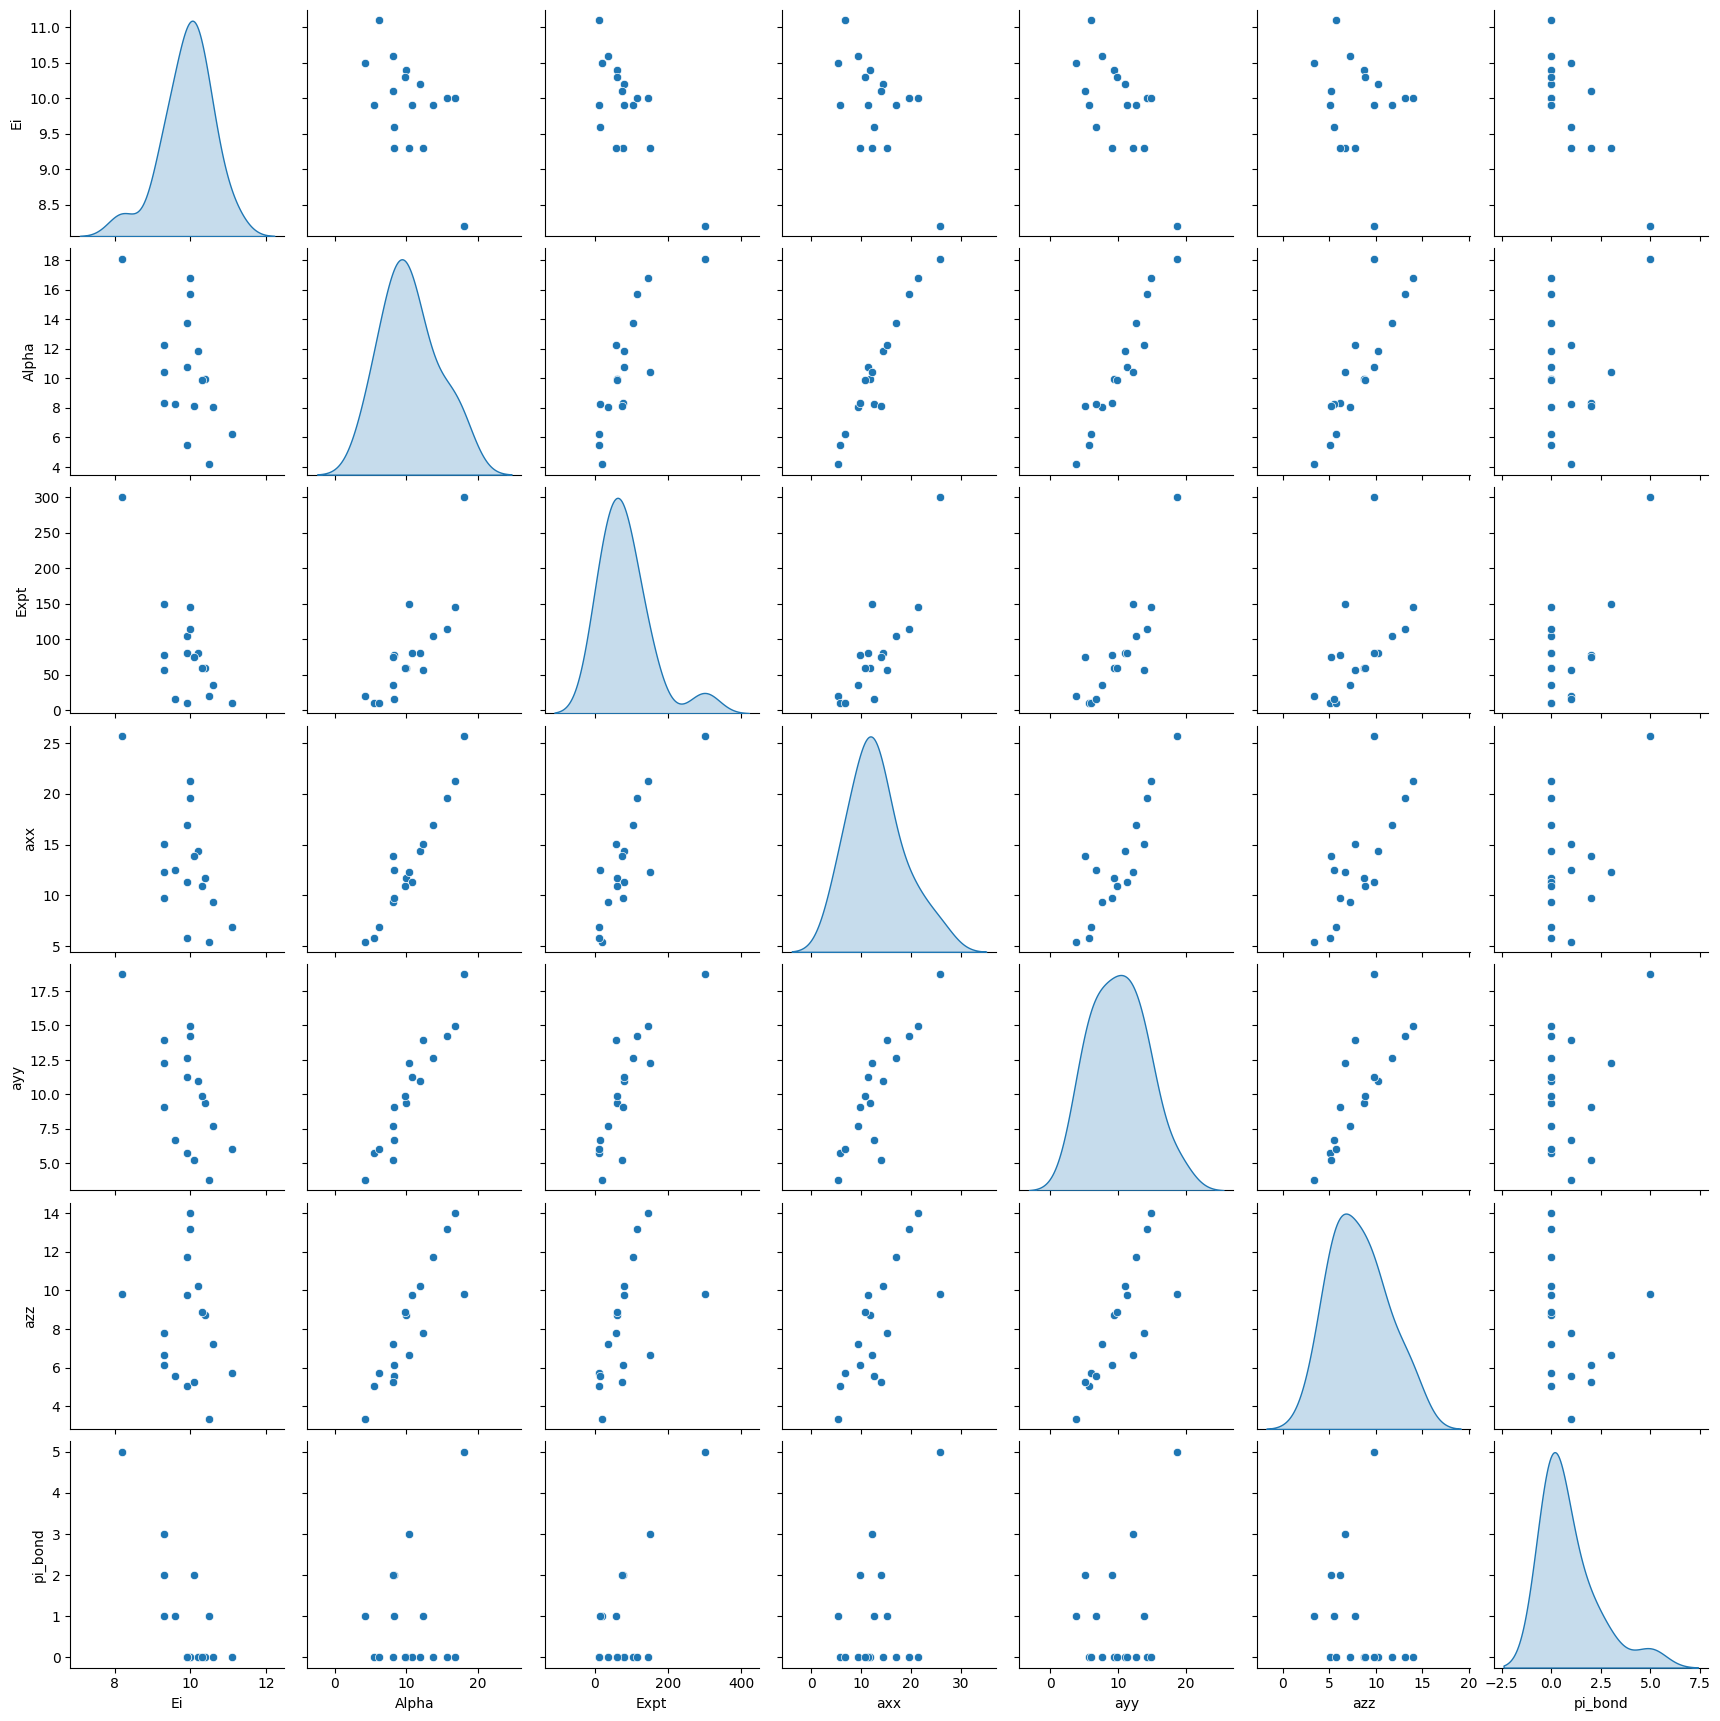

In [16]:
sns.pairplot(partial_df, diag_kind='kde')

In [15]:
# Since axx, ayy and azz are already normal we are not transforming them.

# Nested-CV Performances

In [20]:
%ls

creating_data.py  __init__.py  outputs/  __pycache__/  utils/


In [66]:
# Apolar
df_test_scores_apolar_all = pd.read_csv("../performances/apolar/all_test_score.csv")
df_test_scores_apolar_partial_iso = pd.read_csv("../performances/apolar/partial_iso_test_score.csv")
df_test_scores_apolar_partial_aniso = pd.read_csv("../performances/apolar/partial_aniso_test_score.csv")

list_of_df_apolar = [
    df_test_scores_apolar_all,
    df_test_scores_apolar_partial_iso,
    df_test_scores_apolar_partial_aniso
]

# Polar
df_test_scores_polar_all = pd.read_csv("../performances/polar/all_test_score.csv")
df_test_scores_polar_partial_iso = pd.read_csv("../performances/polar/partial_iso_test_score.csv")
df_test_scores_polar_partial_aniso = pd.read_csv("../performances/polar/partial_aniso_test_score.csv")

list_of_df_polar = [
    df_test_scores_polar_all,
    df_test_scores_polar_partial_iso,
    df_test_scores_polar_partial_aniso
]

# Polar + Apolar
df_test_scores_polar_apolar_all = pd.read_csv("../performances/polar_apolar/all_test_score.csv")
df_test_scores_polar_apolar_partial_iso = pd.read_csv("../performances/polar_apolar/partial_iso_test_score.csv")
df_test_scores_polar_apolar_partial_aniso = pd.read_csv("../performances/polar_apolar/partial_aniso_test_score.csv")

list_of_df_polar_apolar = [
    df_test_scores_polar_apolar_all,
    df_test_scores_polar_apolar_partial_iso,
    df_test_scores_polar_apolar_partial_aniso
]

In [62]:
list(df_test_scores_apolar_all.columns)

['All', 'Ei + Alpha', 'Pi + Ei', 'Pi + Alpha']

In [88]:
def create_fast_graph(df, y='Relative Error',palette='hls', title='Title', show_values=True, show_mean=True,figsize=(12,6), isotropy = True):
    columns = list(df.columns)
    for i in range(len(columns)):
        if 'Alpha' in columns[i]:
            if isotropy:
                columns[i]= columns[i].replace('Alpha', 'Isotropy')
            else:
                columns[i]= columns[i].replace('Alpha', 'Anisotropy')
                
    hue = columns
    models_name = list(df.index)
    
    list_of_errors = []
    for i in df.columns:
        list_of_errors.append(df[i].values)

    model_list = []
    hue_list = []
    errors = []
    aux_model = models_name.copy()

    if show_mean:
        aux_model.append('Mean Error')

    for i in list_of_errors:
        errors.extend(i)
        if show_mean:
            errors.append(np.mean(i))
    

    while len(model_list) < len(errors):
        model_list.extend(aux_model)
  
  
    j=0
    while len(hue_list) < len(errors):
        hue_list.extend([hue[j]]*len(aux_model))
        j = (j+1) % len(hue)
  
    dict_sns = {
      f'{y}':errors,
      'Model':model_list,
      'Feat_Comparison':hue_list
    }

    plt.figure(figsize=figsize)
    ax = sns.barplot(data=dict_sns,x='Model',y=y,hue='Feat_Comparison', palette = palette)
        
    ax.set_xlabel("Models")
    ax.set_ylabel(f"{y}")
    ax.set_title('')

    if show_values:
        for p in ax.patches:
            ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=len(hue), title=None, frameon=False,
)

def plot_all_fast_graphs(list_of_df):
    count = 0
    for i in list_of_df:
        if count == 2:
            create_fast_graph(i, isotropy=False)
        else:
            create_fast_graph(i)
        count += 1

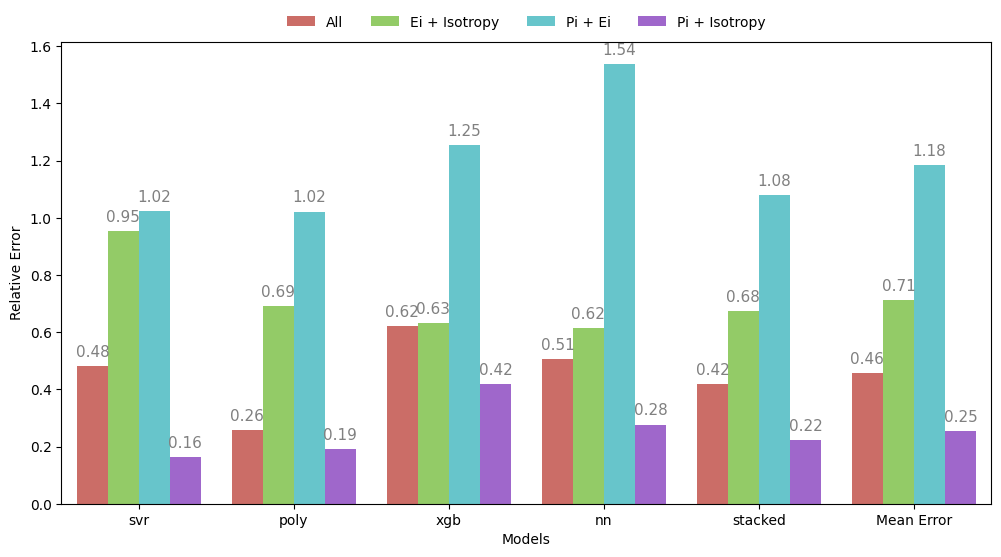

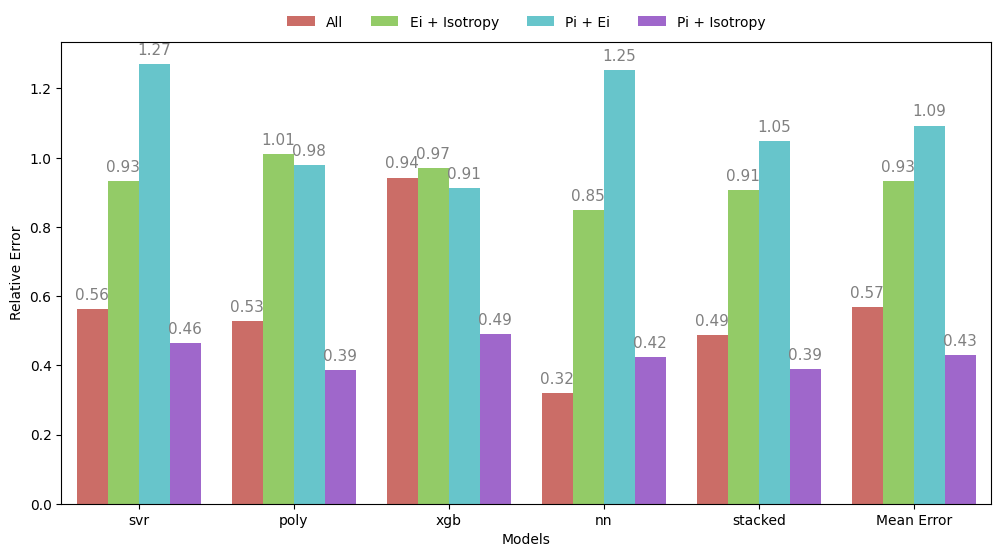

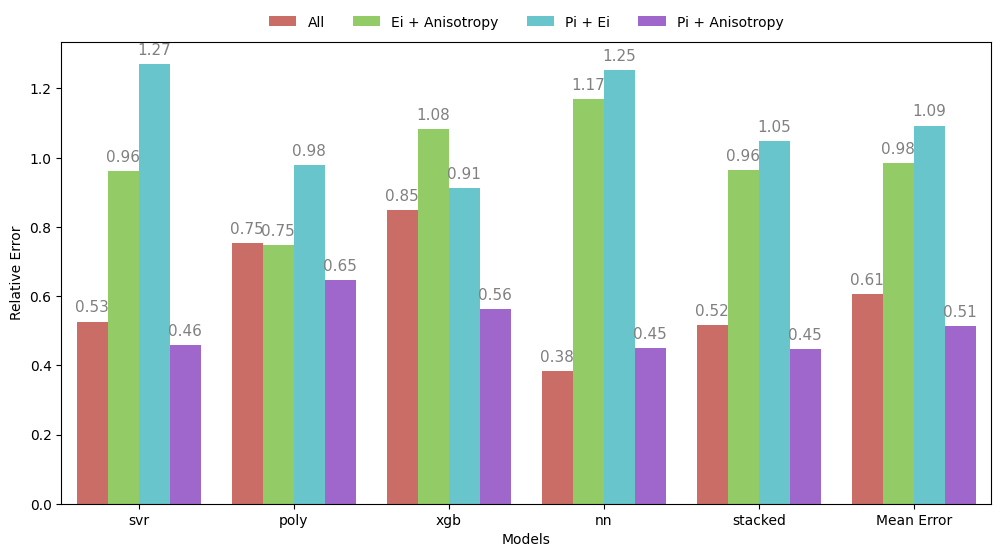

In [89]:
plot_all_fast_graphs(list_of_df_apolar)

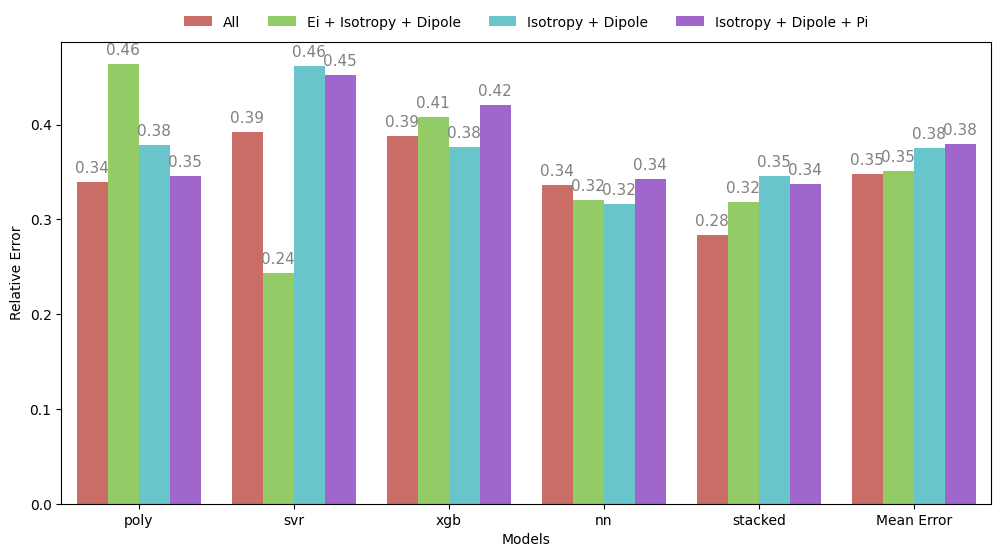

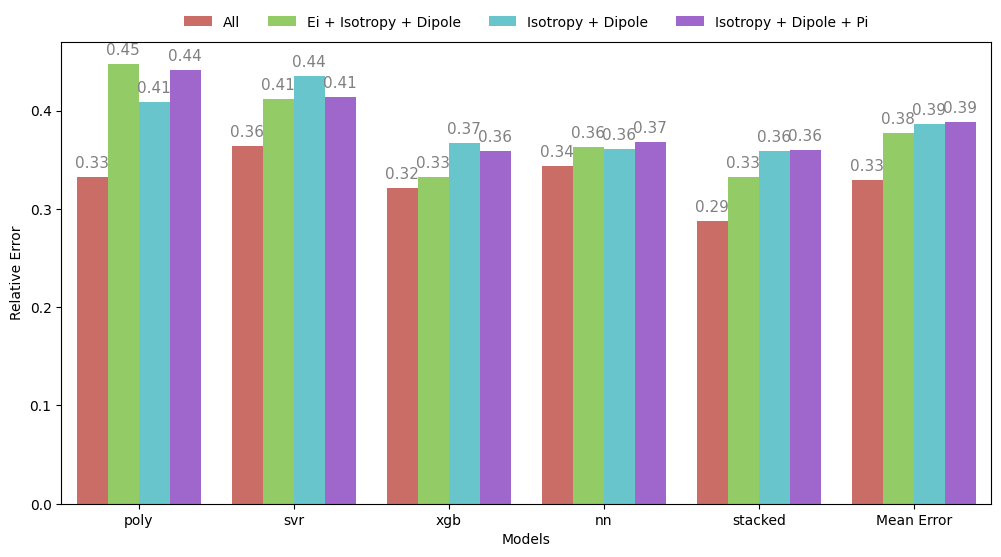

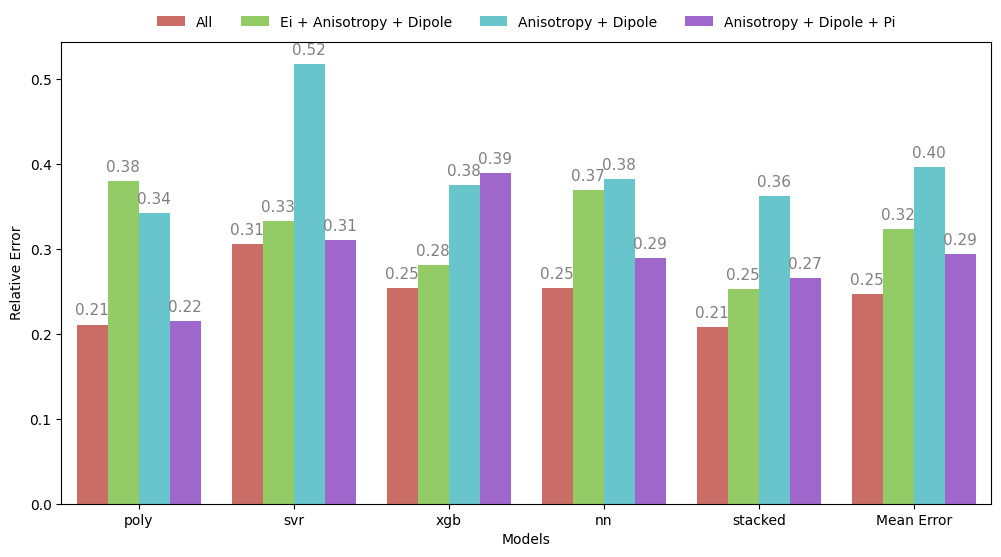

In [90]:
plot_all_fast_graphs(list_of_df_polar)

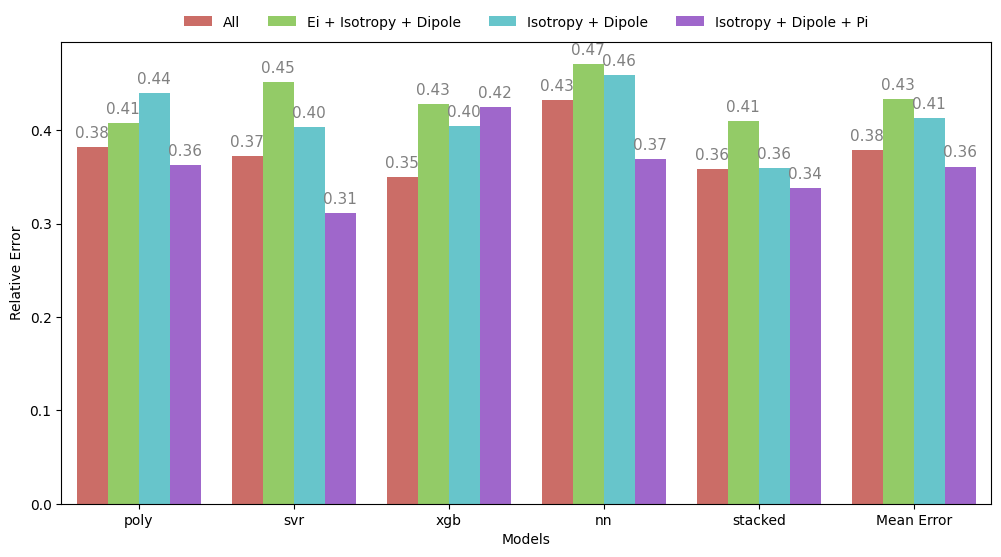

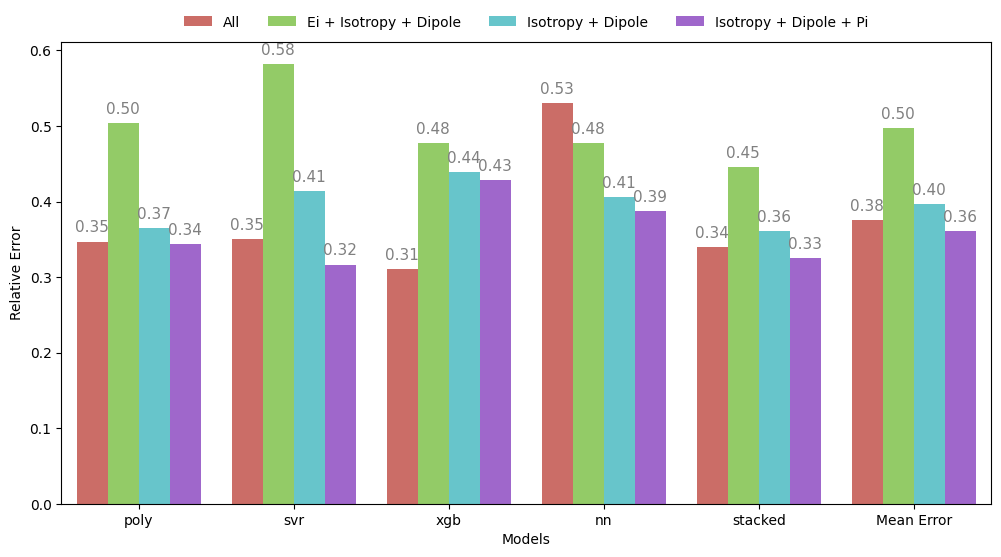

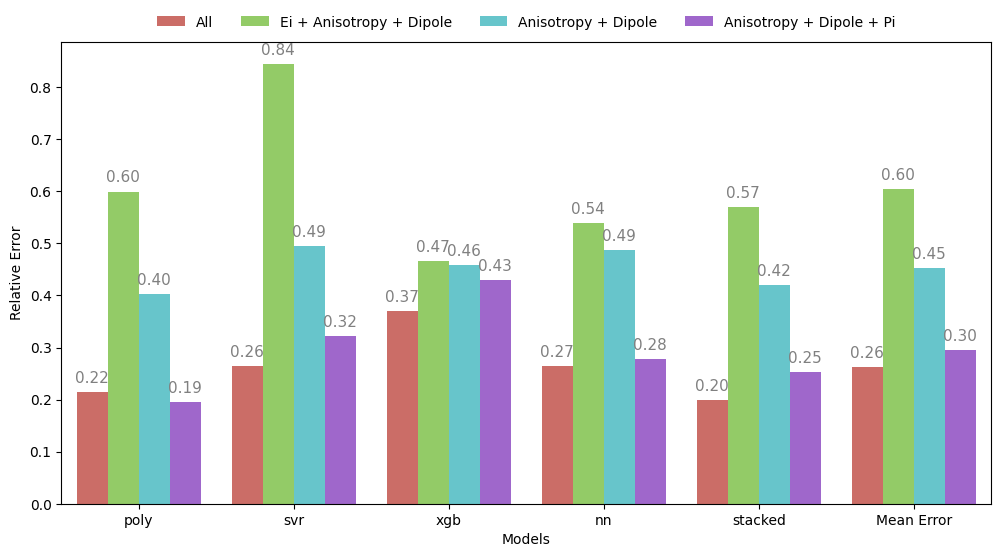

In [91]:
plot_all_fast_graphs(list_of_df_polar_apolar)